# Reproducibility Report
### Student : Omar Faig Orujlu(03750822)
### Paper :  [Associative Memory in Iterated Overparameterized Sigmoid Autoencoders](https://arxiv.org/pdf/2006.16540.pdf)

# Experiment 1 - Single Training Example
In this experiment the same results as in Figure 2 in the paper is reproduced. As stated in the paper the largest (Operator) norm of initial Jacobian for 2 layer sigmoid network is concentrated around 1/2. Also , the initial and final Jacobians are very similar (almost equal) as the number of layers are increased. In the below diagram  the results for 3 and 4 layers are the same as in the paper and for 2 layer case the theoretical results are reproduced .

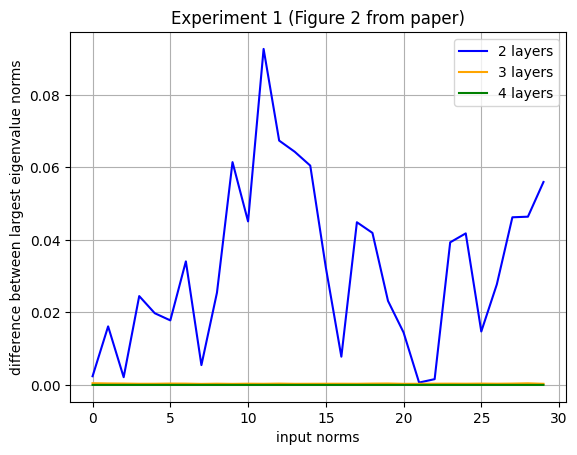

In [1]:
import copy
import numpy as np
import torch.nn.functional as F
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torch import linalg as LA
from torchsummary import summary
from torch.nn.utils import weight_norm
import utils
from matplotlib.ticker import PercentFormatter

#*****************************************************************************************************************************************************************************
diff_list_2=[]
diff_list_3=[]
diff_list_4=[]
epochs = 0
outputs = []
losses = []
for k in range(2,5):
        if k == 2:
            for i in range(1,31):
                input = utils.sample_input_(i,dim=32)
                model = utils.Autoencoder_2_layers_(input_dim=32,hidden_dim=1000)
                optimizer = torch.optim.SGD(params=model.parameters(),lr=1)
                initial_state_dict = copy.deepcopy(model.state_dict())
                loss_function = nn.MSELoss()
                while True:
                    epochs+=1
                    reconstructed = model(input)
                    loss = loss_function(reconstructed, input)
                    optimizer.zero_grad()
                    loss.backward()
                    losses.append(loss.detach().numpy())
                    outputs.append((epochs, input, reconstructed))
                    optimizer.step()
                    if loss<1e-7 :
                        trained_state_dict = model.state_dict()
                        _,diff_2 = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,input)
                        diff_list_2.append(diff_2)
                        break

            k=+1
        if k == 3:
                for i in range(1,31):
                    input = utils.sample_input_(i,dim=32)
                    model = utils.Autoencoder_3_layers(input_dim=32,hidden_dim=1000)
                    optimizer = torch.optim.SGD(params=model.parameters(),lr=1)
                    initial_state_dict = copy.deepcopy(model.state_dict())
                    loss_function = nn.MSELoss()
                    while True:
                        epochs+=1
                        reconstructed = model(input)
                        loss = loss_function(reconstructed, input)
                        optimizer.zero_grad()
                        loss.backward()
                        losses.append(loss.detach().numpy())
                        outputs.append((epochs, input, reconstructed))
                        optimizer.step()
                        if loss<1e-7:
                            trained_state_dict = model.state_dict()
                            diff_list_3.append(utils.calculate_jacobian_3_layers(initial_state_dict,trained_state_dict,input))
                            break
                k=+1
        if k == 4:
                for i in range(1,31):
                    input = utils.sample_input_(i,dim=32)
                    model = utils.Autoencoder_4_layers(input_dim=32,hidden_dim=1000)
                    optimizer = torch.optim.SGD(params=model.parameters(),lr=1)
                    initial_state_dict = copy.deepcopy(model.state_dict())
                    loss_function = nn.MSELoss()
                    while True:
                        epochs+=1
                        reconstructed = model(input)
                        loss = loss_function(reconstructed, input)
                        optimizer.zero_grad()
                        loss.backward()
                        losses.append(loss.detach().numpy())
                        outputs.append((epochs, input, reconstructed))
                        optimizer.step()
                        if loss<1e-7:
                            trained_state_dict = model.state_dict()
                            diff_list_4.append(utils.calculate_jacobian_4_layers(initial_state_dict,trained_state_dict,input))
                            break
                k=+1

plt.plot(diff_list_2,color="blue",label="2 layers")
plt.plot(diff_list_3,color="orange",label="3 layers")
plt.plot(diff_list_4,color="green",label="4 layers")
plt.xlabel('input norms')
plt.ylabel('difference between largest eigenvalue norms')
plt.title('Experiment 1 (Figure 2 from paper)')
#plt.xlim(-1,32)

plt.grid()
plt.legend()
plt.show()

# Experiment 2 -  Multiple Training Example
### Linear Region
This experiment is based on Section 5.3 where the eigenvalue distribution in linear region is demonstrated. Here, a 2 layer sigmoid autoencoder is trained with 2,5, and 8 points and these points have input radius of 1. According to lemma 4 of the paper there should be n-1 eigenvalues with norm around 1. This can be seen in the generated(reproduced) diagram , where 10%,40% and 70% of all eigenvalues are near 1. Since there is eigenvalues with norm 1, it can also be concluded that network operates in linear region

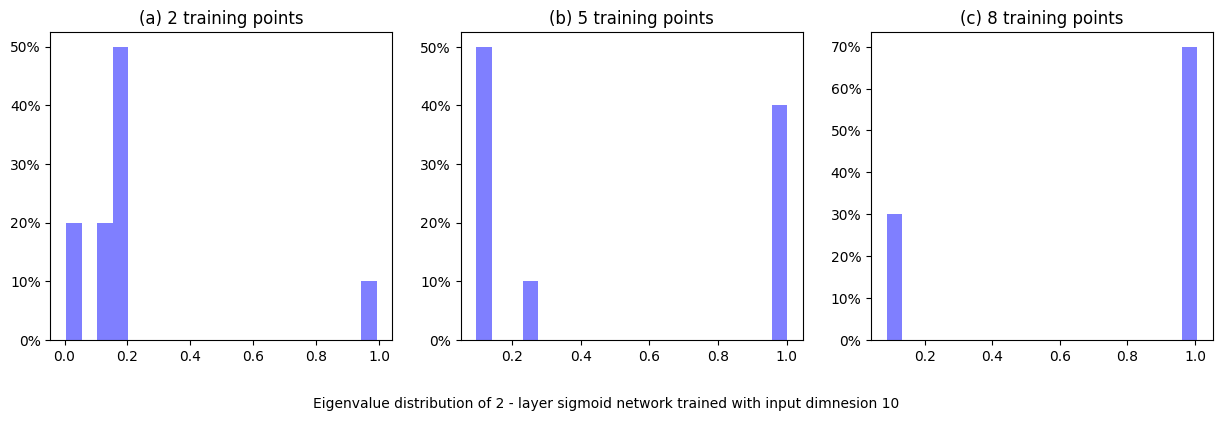

In [8]:
x_2_points = utils.generate_x_training_points(1,10,2)
x_5_points = utils.generate_x_training_points(1,10,5)
x_8_points = utils.generate_x_training_points(1,10,8)
for i in range(0,3):
    if i ==0:
        model = utils.Autoencoder_2_layers_(input_dim=10,hidden_dim=1000)
        optimizer = torch.optim.SGD(params=model.parameters(),lr=3)
        initial_state_dict = copy.deepcopy(model.state_dict())
        loss_function = nn.MSELoss()
        epochs = 0
        outputs = []
        losses = []
        while True:
            epochs+=1
            reconstructed = model(x_2_points)
            loss = loss_function(reconstructed, x_2_points)
          #  if epochs%1000==0:
             # print(epochs , ": Current loss:", loss)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.detach().numpy())
            optimizer.step()
            if loss<1e-7:
                trained_state_dict = model.state_dict()
                eigen_values_p1,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_2_points[0])
                eigen_values_p2,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_2_points[1])
                eigen_values    = torch.cat((eigen_values_p2,eigen_values_p1))
                eigen_values_normed_2p = torch.abs(eigen_values)
                break
    i+=1
    if i ==1:
        model = utils.Autoencoder_2_layers_(input_dim=10,hidden_dim=1000)
        optimizer = torch.optim.SGD(params=model.parameters(),lr=3)
        initial_state_dict = copy.deepcopy(model.state_dict())
        loss_function = nn.MSELoss()
        epochs = 0
        outputs = []
        losses = []
        while True:
            epochs+=1
            reconstructed = model(x_5_points)
            loss = loss_function(reconstructed, x_5_points)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.detach().numpy())
            optimizer.step()
            if loss<1e-7:

                trained_state_dict = model.state_dict()
                eigen_values_p5_1,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[0])
                eigen_values_p5_2,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[1])
                eigen_values_p5_3,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[2])
                eigen_values_p5_4,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[3])
                eigen_values_p5_5,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[4])
                eigen_values_p5    = torch.cat((eigen_values_p5_1,eigen_values_p5_2,eigen_values_p5_3,eigen_values_p5_4,eigen_values_p5_5))
                eigen_values_normed_5p = torch.abs(eigen_values_p5)
                break
    i+=1
    if i ==2:
        model = utils.Autoencoder_2_layers_(input_dim=10,hidden_dim=1000)
        optimizer = torch.optim.SGD(params=model.parameters(),lr=3)
        initial_state_dict = copy.deepcopy(model.state_dict())
        loss_function = nn.MSELoss()
        epochs = 0
        outputs = []
        losses = []
        while True:
            epochs+=1
            reconstructed = model(x_8_points)
            loss = loss_function(reconstructed, x_8_points)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.detach().numpy())
            outputs.append((epochs, x_8_points, reconstructed))
            optimizer.step()
            if loss<1e-7:
                trained_state_dict = model.state_dict()
                eigen_values_p8_1,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[0])
                eigen_values_p8_2,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[1])
                eigen_values_p8_3,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[2])
                eigen_values_p8_4,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[3])
                eigen_values_p8_5,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[4])
                eigen_values_p8_6,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[5])
                eigen_values_p8_7,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[6])
                eigen_values_p8_8,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_8_points[7])
                eigen_values_p8    = torch.cat((eigen_values_p8_1,eigen_values_p8_2,eigen_values_p8_3,eigen_values_p8_4,eigen_values_p8_5,eigen_values_p8_6,eigen_values_p8_7,eigen_values_p8_8))
                eigen_values_normed_8p = torch.abs(eigen_values_p8)
                break

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].hist(eigen_values_normed_2p,weights=np.ones(len(eigen_values_normed_2p)) / len(eigen_values_normed_2p), bins=20, color='blue', alpha=0.5)
axes[1].hist(eigen_values_normed_5p,weights=np.ones(len(eigen_values_normed_5p)) / len(eigen_values_normed_5p), bins=20, color='blue', alpha=0.5)
axes[2].hist(eigen_values_normed_8p,weights=np.ones(len(eigen_values_normed_8p)) / len(eigen_values_normed_8p), bins=20, color='blue', alpha=0.5)

#plt.hist(eigens, weights=np.ones(len(eigens)) / len(eigens),bins=70)
#plt.hist(eig, weights=np.ones(len(eig)) / len(eig),bins=70)
axes[0].yaxis.set_major_formatter(PercentFormatter(1))
axes[1].yaxis.set_major_formatter(PercentFormatter(1))
axes[2].yaxis.set_major_formatter(PercentFormatter(1))
# Set titles for each subplot
axes[0].set_title('(a) 2 training points')
axes[1].set_title('(b) 5 training points')
axes[2].set_title('(c) 8 training points')

# Set common y-axis label
fig.text(0.3, -0.05, 'Eigenvalue distribution of 2 - layer sigmoid network trained with input dimnesion 10', va='center', rotation='horizontal')
plt.show()


## Beyond Linear Region
Here the results from Figure 3 is reproduced. However, in the paper authors have experimented with 5,20, and 40 training points with hidden layer size from 1000 to 1000000.
In the figure below, the results for 2,5, and 10 points for hidden layers size 1000 and 10000 are depicted.That's why results could not be reproduced exactly, however,
similar behavior can be observed.
Note: I tried to run the experiment with 20 training points but it took 30+ hours(for input norm 1.0).

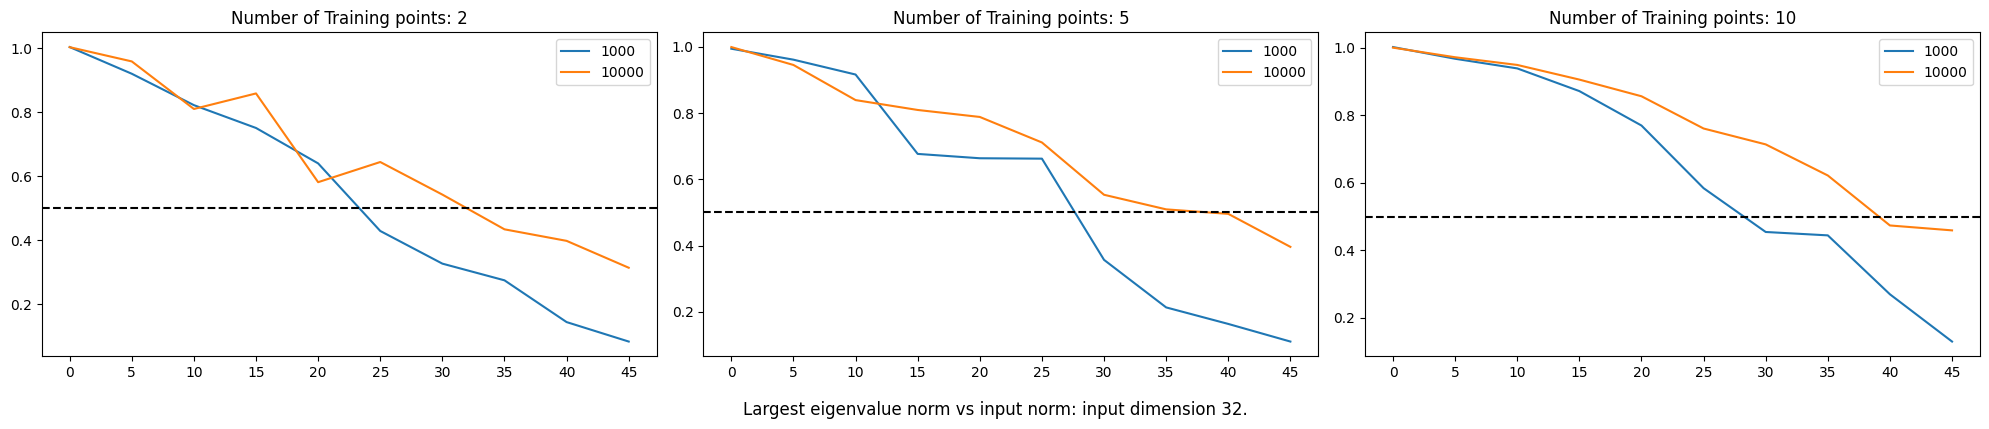

In [5]:
hidden_layers=[1000,10000]
results_1={}
results_2={}
results_3={}
for t in range(0,3):
    if t==0:
        epochs = 0
        outputs = []
        losses = []

        for k in range(0,len(hidden_layers)):
            largest_eigen_list=[]
            for i in range (3,53):
                    x_2_points = utils.generate_x_training_points(i,32,2)#increase i too hundred and generate points at i/2 norms
                    model = utils.Autoencoder_2_layers_(input_dim=32,hidden_dim=hidden_layers[k])
                    optimizer = torch.optim.SGD(params=model.parameters(),lr=5)
                    initial_state_dict = copy.deepcopy(model.state_dict())
                    loss_function = nn.MSELoss()
                    epochs = 0
                    outputs = []
                    losses = []
                    while True:
                        epochs+=1
                        reconstructed = model(x_2_points)
                        loss = loss_function(reconstructed, x_2_points)
                        optimizer.zero_grad()
                        loss.backward()
                        losses.append(loss.detach().numpy())
                        optimizer.step()
                        if loss<1e-7:#should be 1e-7 according to paper
                            trained_state_dict = model.state_dict()
                            eigen_values_p3,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_2_points[2])
                            larg_eigen=torch.max(torch.abs(eigen_values_p3))
                            largest_eigen_list.append(larg_eigen)
                            break

            results_1[k]=largest_eigen_list
    if t==1:
        epochs = 0
        outputs = []
        losses = []
        for k in range(0,len(hidden_layers)):
            largest_eigen_list=[]
            for i in range (3,53):
                    x_5_points = utils.generate_x_training_points(i,32,5)#increase i too hundred and generate points at i/2 norms
                    model = utils.Autoencoder_2_layers_(input_dim=32,hidden_dim=hidden_layers[k])
                    optimizer = torch.optim.SGD(params=model.parameters(),lr=5)
                    initial_state_dict = copy.deepcopy(model.state_dict())
                    loss_function = nn.MSELoss()
                    epochs = 0
                    outputs = []
                    losses = []
                    while True:
                        epochs+=1
                        reconstructed = model(x_5_points)
                        loss = loss_function(reconstructed, x_5_points)
                        optimizer.zero_grad()
                        loss.backward()
                        losses.append(loss.detach().numpy())
                        optimizer.step()
                        if loss<1e-7:#should be 1e-7 according to paper
                            trained_state_dict = model.state_dict()
                            eigen_values_p3,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[2])
                            larg_eigen=torch.max(torch.abs(eigen_values_p3))
                            largest_eigen_list.append(larg_eigen)
                            break
            results_2[k]=largest_eigen_list
    if t==2:
        epochs = 0
        outputs = []
        losses = []
        for k in range(0,len(hidden_layers)):
            largest_eigen_list=[]
            for i in range (3,53):
                    x_10_points = utils.generate_x_training_points(i,32,10)#increase i too hundred and generate points at i/2 norms
                    model = utils.Autoencoder_2_layers_(input_dim=32,hidden_dim=hidden_layers[k])
                    optimizer = torch.optim.SGD(params=model.parameters(),lr=5)
                    initial_state_dict = copy.deepcopy(model.state_dict())
                    loss_function = nn.MSELoss()
                    epochs = 0
                    outputs = []
                    losses = []
                    while True:
                        epochs+=1
                        reconstructed = model(x_10_points)
                        loss = loss_function(reconstructed, x_10_points)
                        optimizer.zero_grad()
                        loss.backward()
                        losses.append(loss.detach().numpy())
                        optimizer.step()
                        if loss<1e-7:#should be 1e-7 according to paper
                            trained_state_dict = model.state_dict()
                            eigen_values_p3,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_10_points[2])
                            larg_eigen=torch.max(torch.abs(eigen_values_p3))
                            largest_eigen_list.append(larg_eigen)
                            break
            results_3[k]=largest_eigen_list

x_values = list(range(0, len(results_1[1]), 5))
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

# Plotting the line graphs for each dictionary
axs[0].plot(x_values, results_1[0][::5], label='1000')
axs[0].plot(x_values, results_1[1][::5], label='10000')
axs[0].set_title('Number of Training points: 2')
axs[0].set_xticks(x_values)
axs[0].legend()

axs[1].plot(x_values, results_2[0][::5], label='1000')
axs[1].plot(x_values, results_2[1][::5], label='10000')
axs[1].set_title('Number of Training points: 5')
axs[1].set_xticks(x_values)
axs[1].legend()

axs[2].plot(x_values, results_3[0][::5], label='1000')
axs[2].plot(x_values, results_3[1][::5], label='10000')
axs[2].set_title('Number of Training points: 10')
axs[2].set_xticks(x_values)
axs[2].legend()

# Adding the horizontal line to each diagram
axs[0].axhline(0.5, linestyle='--', color='black')
axs[1].axhline(0.5, linestyle='--', color='black')
axs[2].axhline(0.5, linestyle='--', color='black')

fig.text(0.5, -0.05, 'Largest eigenvalue norm vs input norm: input dimension 32.', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


# Experiment 4 - Basin of Attraction
Here the results from section 5.4 are reproduced. 5 training points with dimension 32 are used for training the model.. As stated in the paper, attractor formulation in
small norms fails, this can also be observed in the following diagrams.

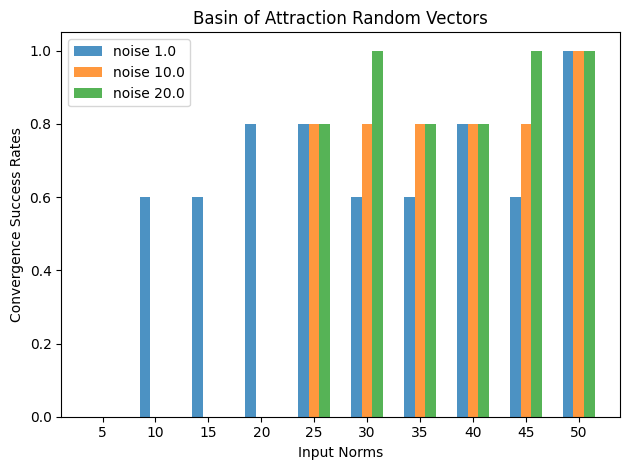

In [6]:
epochs = 0
outputs = []
losses = []
input_norms = list(range(5, 51, 5))
std_list = [1, 10, 20]
conver = {}
for t in std_list:
    for i in input_norms:
        input = utils.generate_x_training_points(i, 32, 5)
        model = utils.Autoencoder_2_layers_(input_dim=32, hidden_dim=10000)
        optimizer = torch.optim.SGD(params=model.parameters(), lr=3)
        loss_function = nn.MSELoss()
        while True:
            epochs += 1
            reconstructed = model(input)
            loss = loss_function(reconstructed, input)
            optimizer.zero_grad()
            loss.backward()
            losses.append(loss.detach().numpy())
            #outputs.append((epochs, input, reconstructed))
            optimizer.step()
            if loss < 1e-7:
                noisy = input + np.sqrt(t) * torch.randn_like(input)
                #print("original input",input)

                #print("original noisy output",noisy)
                for k in range(0, 51):
                    noisy = model(noisy)
                    #noisy = noisy_result
                   # print("noisy output after iteration no ",k, "noisys",noisy)
                    loss_ = loss_function(noisy, input)
                    #print("loss_ of convergence", loss_, "num of iteration", k, "norm", i, "noise", t)
                    if k==50 and  not (loss_<1e-2):
                        convergence_rate = 0
                        conver.setdefault(t, []).append(convergence_rate)
                        #print("converged", 0 , "after iteration no ", k, "norm of vector", i, "convergence rate", convergence_rate, "noise", t)
                        break
                    if loss_ < 1e-2 :
                        convergence = 0
                        convergence_rate=0
                        #c#onverged_samples = torch.sum(torch.all(torch.abs(input - noisy) < 0.1, dim=1)).item()
                        #convergence_rate = converged_samples / input.shape[0]
                        if loss_function(noisy[0], input[0]) < 0.01: convergence += 1
                        if loss_function(noisy[1], input[1]) < 0.01: convergence += 1
                        if loss_function(noisy[2], input[2]) < 0.01: convergence += 1
                        if loss_function(noisy[3], input[3]) < 0.01: convergence += 1
                        if loss_function(noisy[4], input[4]) < 0.01: convergence += 1
#
                        convergence_rate = convergence / len(input)
                        conver.setdefault(t, []).append(convergence_rate)
                        #print("converged", convergence, "after iteration no ", k, "norm of vector", i, "convergence rate", convergence_rate, "noise", t)
                        break
                break
x_labels = list(range(5, 51, 5))
data1 = conver[1]
data2 = conver[10]
data3 = conver[20]

# Plotting
x = range(len(x_labels))
bar_width = 0.2
opacity = 0.8

plt.bar(x, data1, bar_width, alpha=opacity, label='noise 1.0')
plt.bar([val + bar_width for val in x], data2, bar_width, alpha=opacity, label='noise 10.0')
plt.bar([val + 2 * bar_width for val in x], data3, bar_width, alpha=opacity, label='noise 20.0')

plt.xlabel('Input Norms')
plt.ylabel('Convergence Success Rates')
plt.title('Basin of Attraction Random Vectors')
plt.xticks([val + bar_width for val in x], input_norms)
plt.legend()
plt.tight_layout()
plt.show()


# Experiment 5 - Sigmoidal Activation
Here the results from Section 5.5 are reproduced. A  two layer sigmoid, tanh and erf autoencoder are trained. However, here sigmoid network has 10 training points and
others 20. Results are very similar to the ones in figure 5. in the paper and as it is stated in paper , erf and tanh have eigenalues bigger than 1.0 at small input norms.


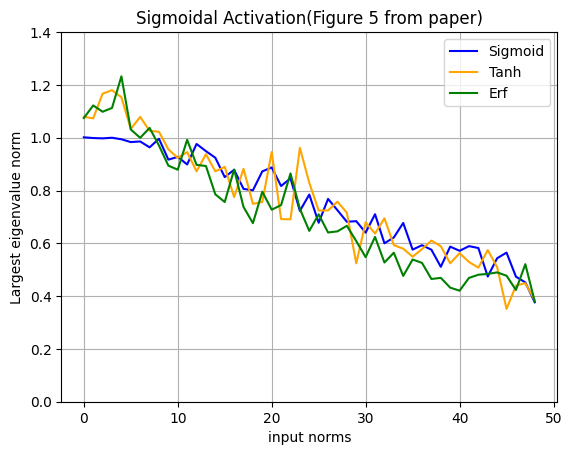

In [7]:
largest_eigen_list_sigmoid=[]
largest_eigen_list_tanh=[]
largest_eigen_list_erf=[]
epochs = 0
outputs = []
losses = []
for i in range (2,51):
            x_5_points = utils.generate_x_training_points(i,32,20)
            model = utils.Autoencoder_2_layers_erf(input_dim=32,hidden_dim=10000)
            optimizer = torch.optim.SGD(params=model.parameters(),lr=5)
            initial_state_dict = copy.deepcopy(model.state_dict())
            loss_function = nn.MSELoss()
            epochs = 0
            outputs = []
            losses = []
            while True:
                epochs+=1
                reconstructed = model(x_5_points)
                loss = loss_function(reconstructed, x_5_points)

                optimizer.zero_grad()
                loss.backward()
                losses.append(loss.detach().numpy())
                optimizer.step()
                if loss<1e-7:
                    trained_state_dict = model.state_dict()
                    eigen_values_p3,_ = utils.calculate_jacobian_2_layers_erf(initial_state_dict,trained_state_dict,x_5_points[2])
                    larg_eigen=torch.max(torch.abs(eigen_values_p3))
                    largest_eigen_list_erf.append(larg_eigen)
                    break

for i in range (2,51):
            x_5_points = utils.generate_x_training_points(i,32,10)
            model = utils.Autoencoder_2_layers_(input_dim=32,hidden_dim=10000)
            optimizer = torch.optim.SGD(params=model.parameters(),lr=5)
            initial_state_dict = copy.deepcopy(model.state_dict())
            loss_function = nn.MSELoss()
            epochs = 0
            outputs = []
            losses = []
            while True:
                epochs+=1
                reconstructed = model(x_5_points)
                loss = loss_function(reconstructed, x_5_points)
                optimizer.zero_grad()
                loss.backward()
                losses.append(loss.detach().numpy())
                optimizer.step()
                if loss<1e-7:
                    trained_state_dict = model.state_dict()
                    eigen_values_p3,_ = utils.calculate_jacobian_2_layers_(initial_state_dict,trained_state_dict,x_5_points[2])
                    larg_eigen=torch.max(torch.abs(eigen_values_p3))
                    largest_eigen_list_sigmoid.append(larg_eigen)
                    break

for i in range (2,51):
            x_5_points = utils.generate_x_training_points(i,32,20)
            model = utils.Autoencoder_2_layers_tanh(input_dim=32,hidden_dim=10000)
            optimizer = torch.optim.SGD(params=model.parameters(),lr=5)
            initial_state_dict = copy.deepcopy(model.state_dict())
            loss_function = nn.MSELoss()
            epochs = 0
            outputs = []
            losses = []
            while True:
                epochs+=1
                reconstructed = model(x_5_points)
                loss = loss_function(reconstructed, x_5_points)
                optimizer.zero_grad()
                loss.backward()
                losses.append(loss.detach().numpy())
                optimizer.step()
                if loss<1e-7:
                    trained_state_dict = model.state_dict()
                    eigen_values_p3,_ = utils.calculate_jacobian_2_layers_tanh(initial_state_dict,trained_state_dict,x_5_points[2])
                    larg_eigen=torch.max(torch.abs(eigen_values_p3))
                    largest_eigen_list_tanh.append(larg_eigen)
                    break

plt.plot(largest_eigen_list_sigmoid,color="blue",label="Sigmoid")
plt.plot(largest_eigen_list_tanh,color="orange",label="Tanh")
plt.plot(largest_eigen_list_erf,color="green",label="Erf")
plt.xlabel('input norms')
plt.ylabel('Largest eigenvalue norm')
plt.title('Input Radius and Eigenvalue Norm Curve for Different Activation Functions')
plt.ylim(0,1.4)
plt.grid()
plt.legend()
plt.show()

# Possible Extension
In the paper , authors argue that same/similar results can be obtained if tanh/erf functions are used for above experiments.I want to repeat experiments 1-3 with tanh and
erf activation functions.